In [5]:
import pandas as pd

df = pd.read_csv("C:/Users/rlarh/Desktop/tops-pattern/data/annotations/pattern_dataset.csv")
df.head()

,image_name,label_name,filepath,exists
0,asos_202345339.jpg,polka_dot,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
1,asos_203232535.jpg,floral,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
2,asos_204701599.jpg,polka_dot,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
3,asos_204757013.jpg,floral,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
4,asos_204860614.jpg,polka_dot,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False


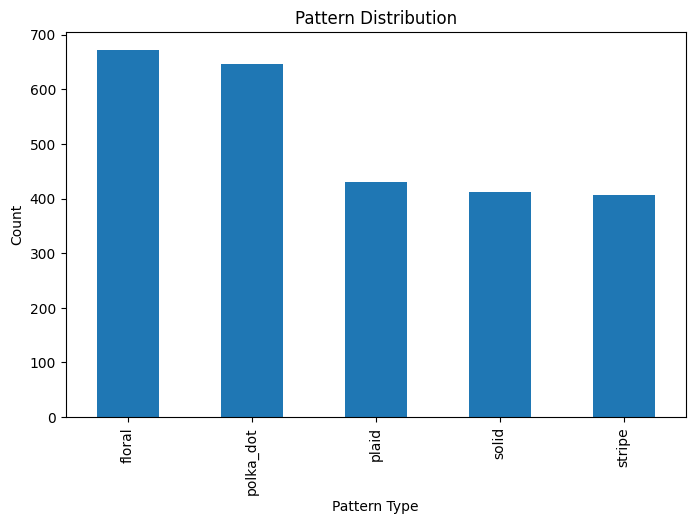

In [6]:
import matplotlib.pyplot as plt

df['label_name'].value_counts().plot(kind='bar', title="Pattern Distribution", figsize=(8,5))
plt.xlabel("Pattern Type")
plt.ylabel("Count")
plt.show()

In [8]:
import os

BASE = "C:/Users/rlarh/Desktop/tops-pattern/data/raw/tops"

df['filepath'] = df.apply(
    lambda row: os.path.join(BASE, row['label_name'], row['image_name']),
    axis=1
)

# 경로에서 백슬래시 → 슬래시로 변환
df['filepath'] = df['filepath'].apply(lambda x: x.replace("\\", "/"))

df.head()

,image_name,label_name,filepath,exists
0,asos_202345339.jpg,polka_dot,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
1,asos_203232535.jpg,floral,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
2,asos_204701599.jpg,polka_dot,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
3,asos_204757013.jpg,floral,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False
4,asos_204860614.jpg,polka_dot,C:/Users/rlarh/Desktop/tops-pattern/data/raw/t...,False


In [9]:
df['exists'] = df['filepath'].apply(os.path.exists)
df['exists'].value_counts()

exists
True     2486
False      80
Name: count, dtype: int64

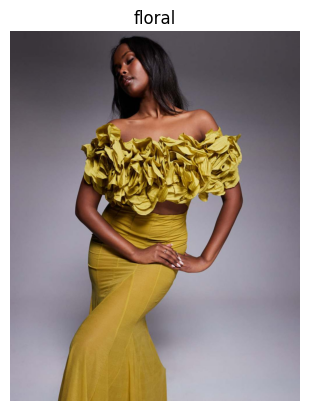

In [10]:
import cv2
import matplotlib.pyplot as plt

sample = df.sample(5)
for _, row in sample.iterrows():
    img = cv2.imread(row['filepath'])
    if img is None:
        print("❌ 실패:", row['filepath'])
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(row['label_name'])
        plt.axis("off")